<a href="https://colab.research.google.com/github/rangerbottle/DL_Sample/blob/master/Colab_VAE_Helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
image_count = 10
data = mnist.train.next_batch(image_count)

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


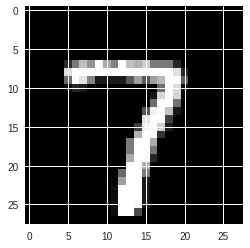

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


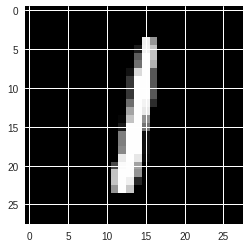

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


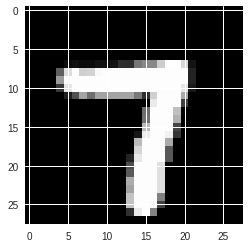

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


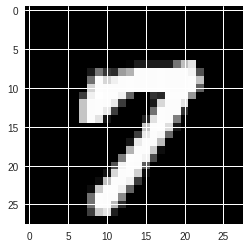

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


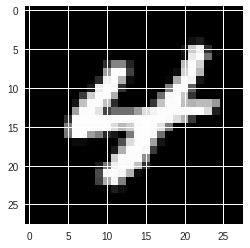

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Digit in the image 4


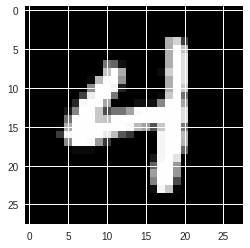

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


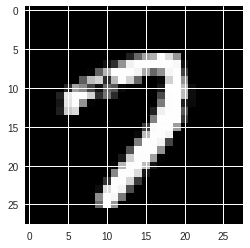

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


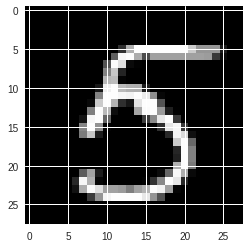

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


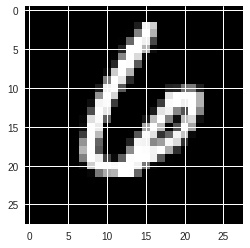

Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Digit in the image 7


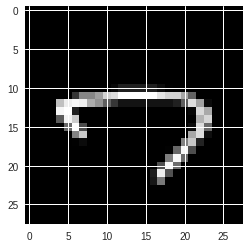

In [6]:
images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for index, image in enumerate(images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

In [0]:
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [0]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd

In [0]:
def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

In [10]:
sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.


In [11]:
unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use tf.cast instead.


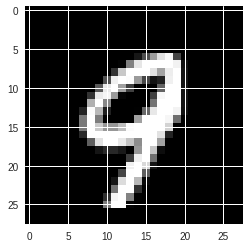

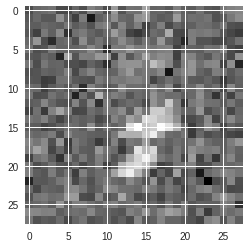

(0, 176.9848, 176.98132, 0.0034698327)


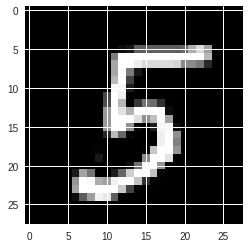

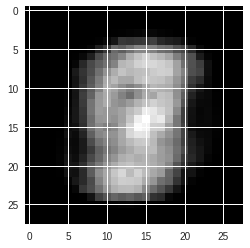

(200, 53.615852, 51.82138, 1.7944665)


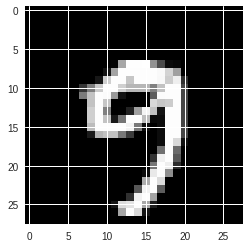

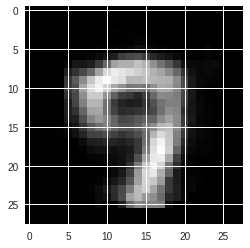

(400, 43.07303, 37.950027, 5.123002)


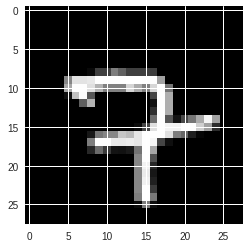

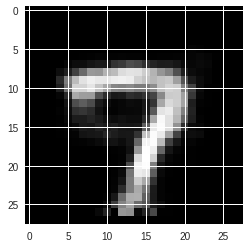

(600, 33.960674, 26.64526, 7.3154154)


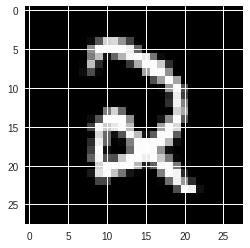

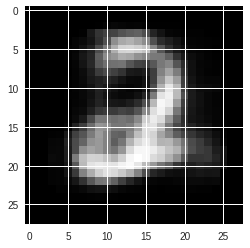

(800, 33.926575, 26.15083, 7.775745)


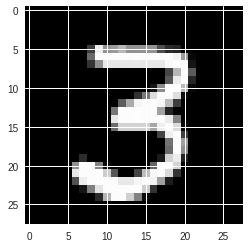

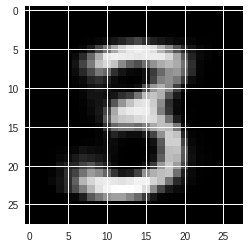

(1000, 31.957432, 24.01629, 7.9411426)


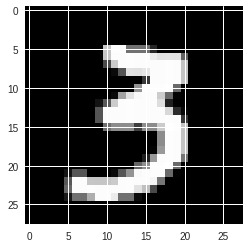

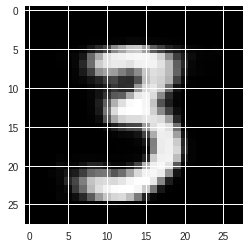

(1200, 34.10231, 25.430706, 8.671601)


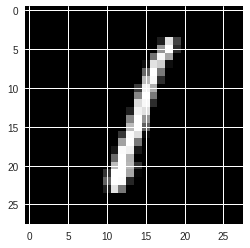

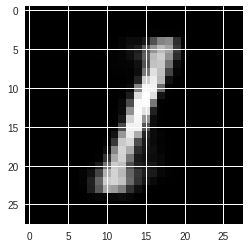

(1400, 32.200993, 23.444489, 8.756506)


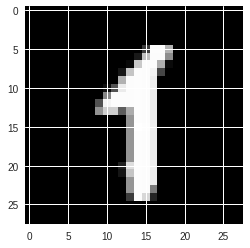

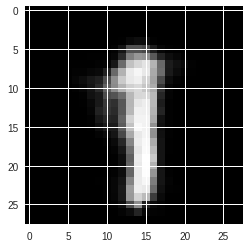

(1600, 34.066936, 24.832062, 9.234874)


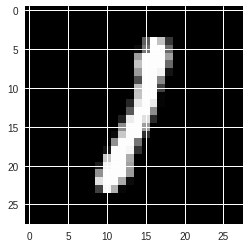

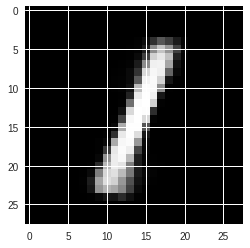

(1800, 29.724342, 20.22832, 9.496022)


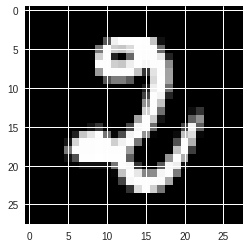

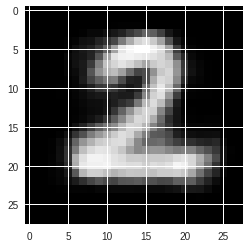

(2000, 30.86655, 21.376608, 9.489943)


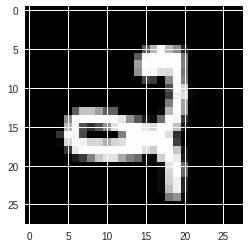

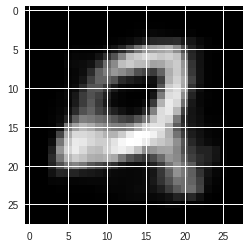

(2200, 32.069656, 22.227407, 9.842247)


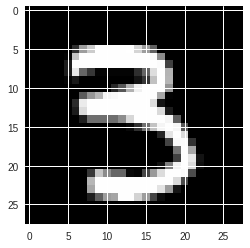

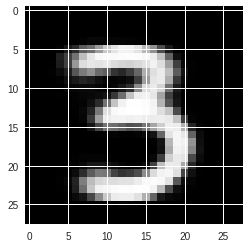

(2400, 31.207634, 21.815933, 9.3917)


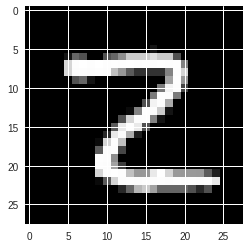

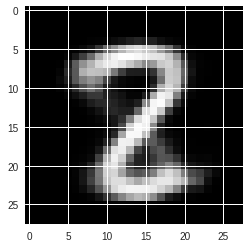

(2600, 29.335999, 19.939846, 9.396151)


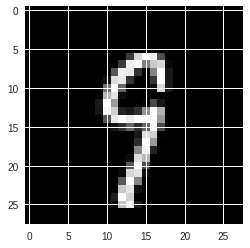

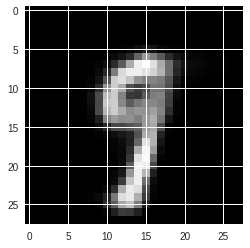

(2800, 29.015345, 19.42776, 9.587583)


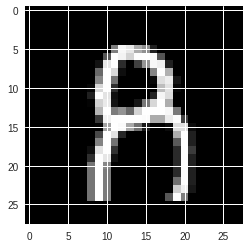

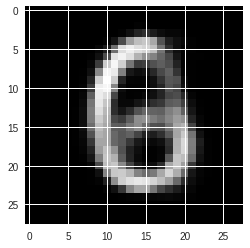

(3000, 29.842365, 19.751093, 10.091272)


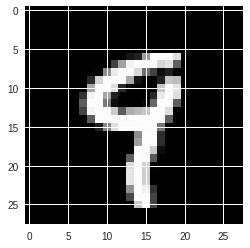

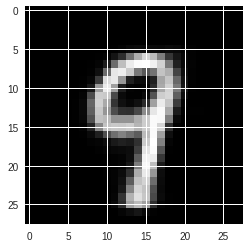

(3200, 30.86058, 21.638227, 9.222352)


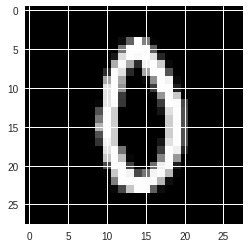

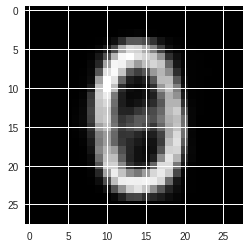

(3400, 28.824244, 19.048922, 9.775322)


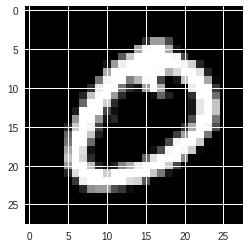

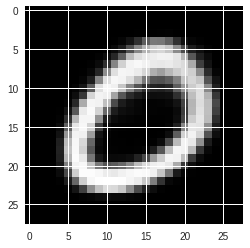

(3600, 28.534977, 19.635578, 8.899401)


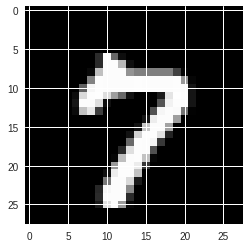

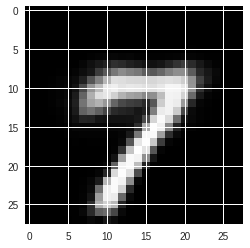

(3800, 28.807993, 19.22845, 9.579542)


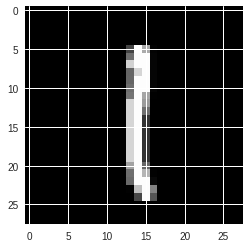

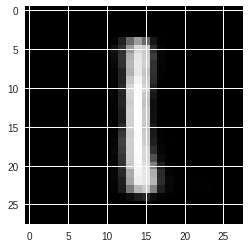

(4000, 27.80527, 18.362871, 9.442398)


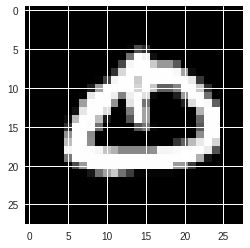

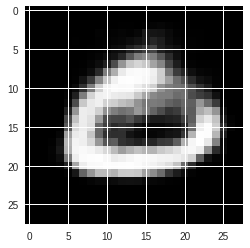

(4200, 30.343586, 20.42765, 9.915935)


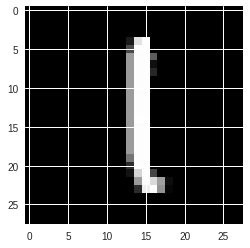

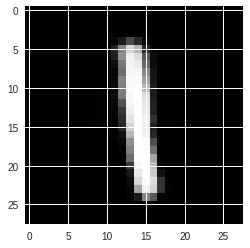

(4400, 29.425232, 19.67381, 9.751423)


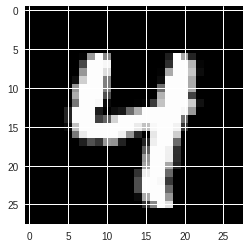

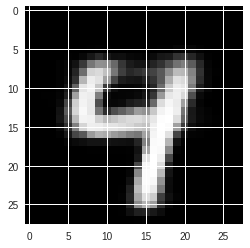

(4600, 28.984436, 19.222954, 9.761479)


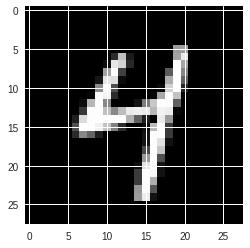

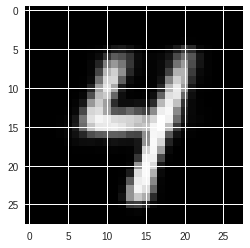

(4800, 29.300644, 19.613815, 9.6868305)


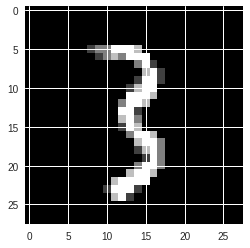

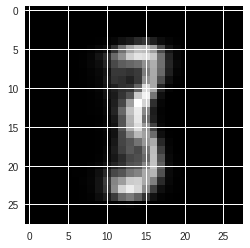

(5000, 30.115585, 20.498453, 9.617134)


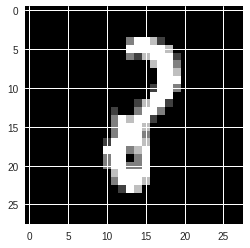

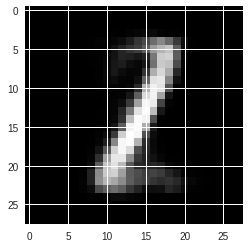

(5200, 28.909693, 18.728731, 10.180962)


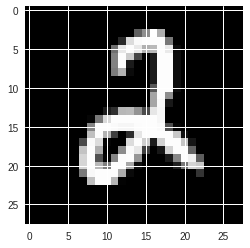

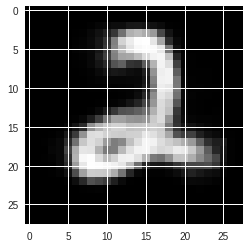

(5400, 30.273167, 20.216854, 10.056314)


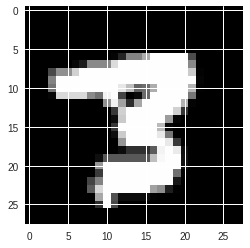

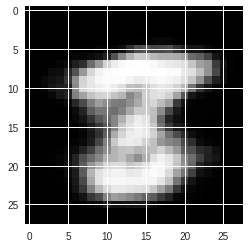

(5600, 31.181362, 20.827538, 10.3538265)


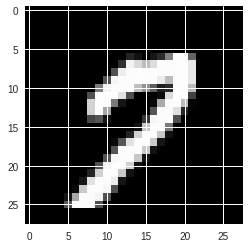

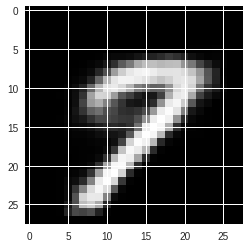

(5800, 29.569572, 19.167286, 10.402288)


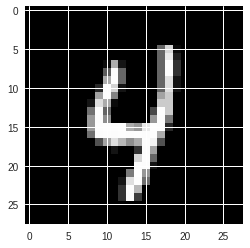

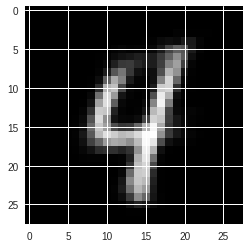

(6000, 28.647713, 18.873487, 9.774226)


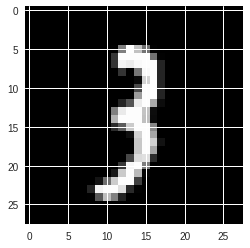

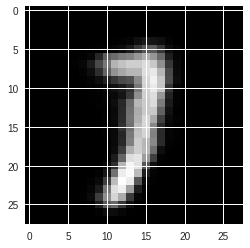

(6200, 28.612692, 18.742722, 9.86997)


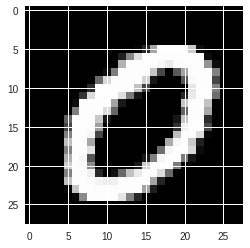

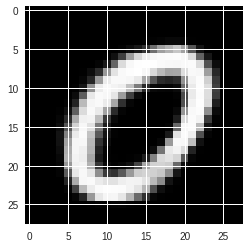

(6400, 28.106846, 18.747622, 9.359223)


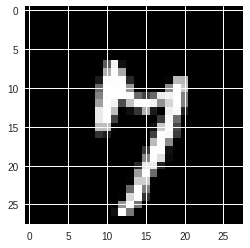

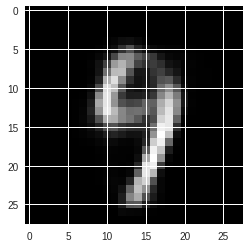

(6600, 27.908684, 17.735647, 10.173037)


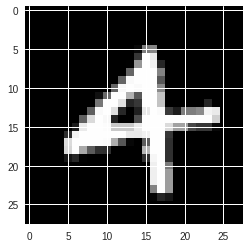

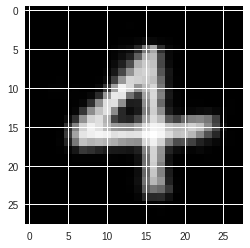

(6800, 27.497034, 18.065617, 9.431417)


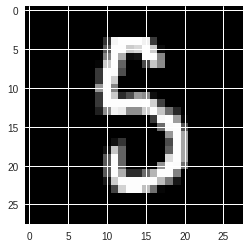

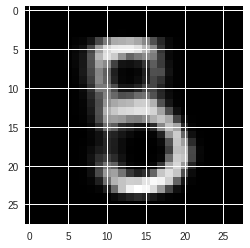

(7000, 28.530344, 18.466621, 10.063723)


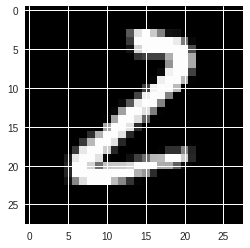

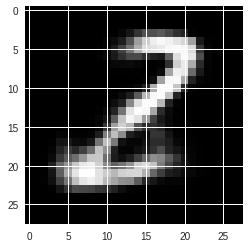

(7200, 26.67511, 16.522957, 10.152154)


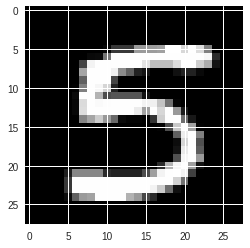

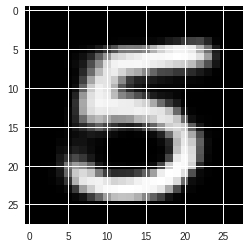

(7400, 26.461834, 16.533472, 9.928361)


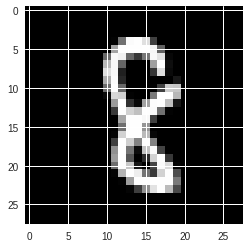

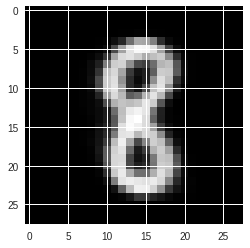

(7600, 28.545654, 18.328148, 10.217508)


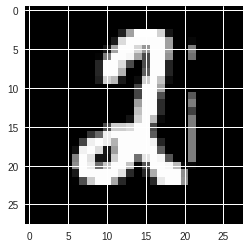

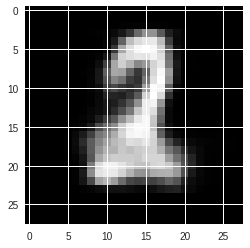

(7800, 27.46291, 17.114069, 10.348839)


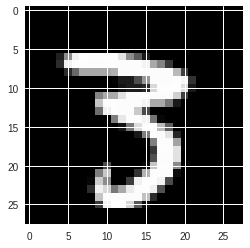

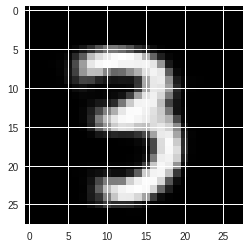

(8000, 27.781315, 17.618298, 10.163015)


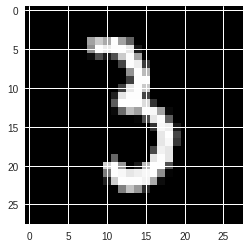

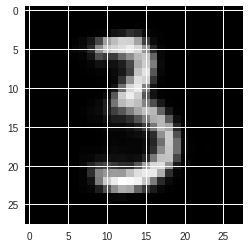

(8200, 29.470932, 19.213938, 10.256994)


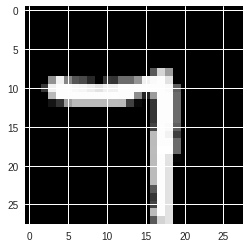

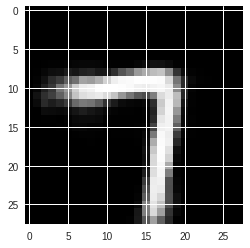

(8400, 28.491013, 18.423313, 10.067701)


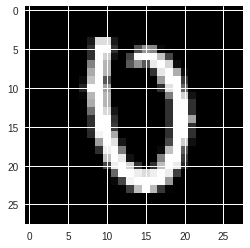

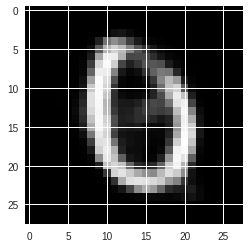

(8600, 27.497906, 17.537247, 9.960657)


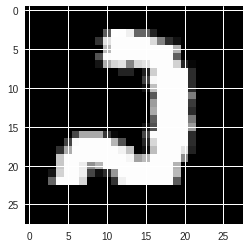

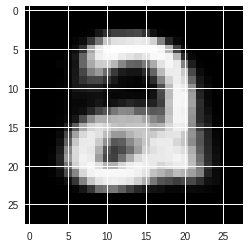

(8800, 28.8058, 18.350464, 10.455336)


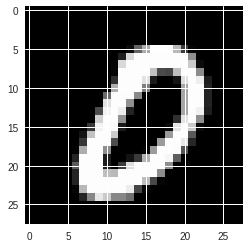

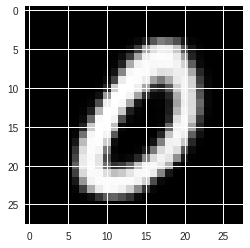

(9000, 29.002571, 19.067589, 9.934982)


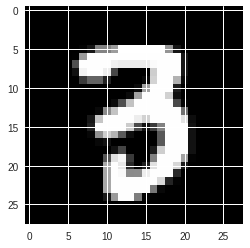

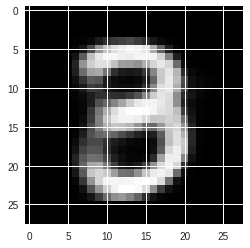

(9200, 30.374168, 19.760271, 10.613897)


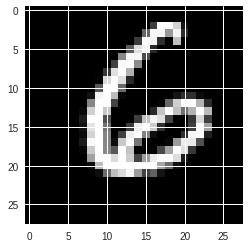

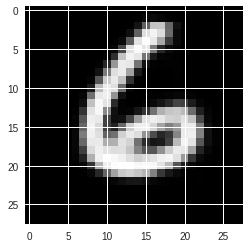

(9400, 30.852978, 20.738476, 10.114501)


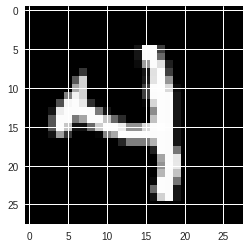

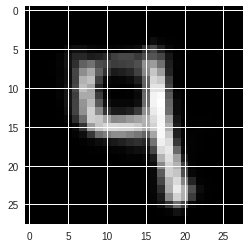

(9600, 28.906498, 18.955458, 9.951041)


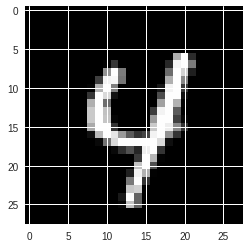

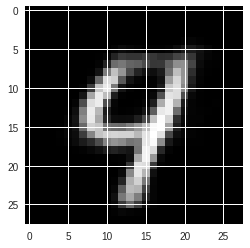

(9800, 28.267614, 18.568396, 9.699219)


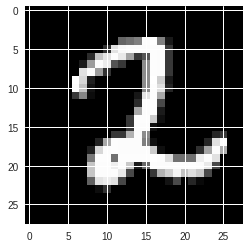

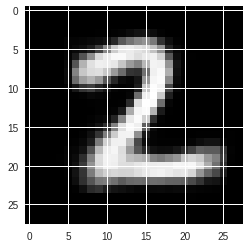

(10000, 27.342712, 17.692616, 9.650095)


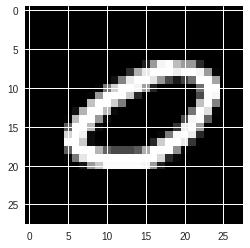

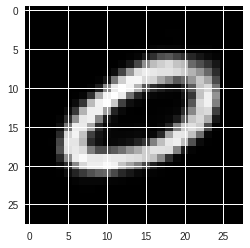

(10200, 27.406008, 17.381275, 10.0247345)


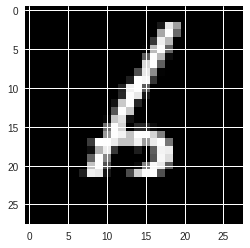

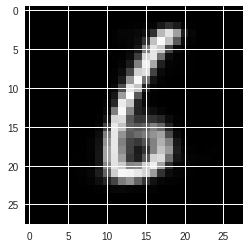

(10400, 28.630066, 18.677433, 9.952635)


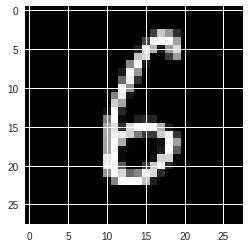

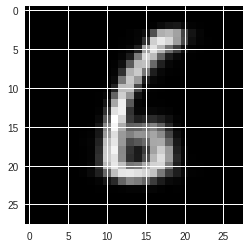

(10600, 27.988022, 17.45505, 10.532974)


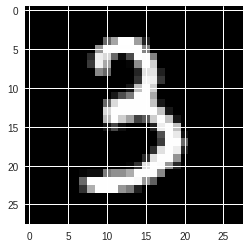

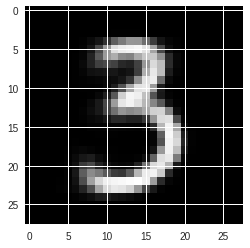

(10800, 27.969864, 17.866339, 10.103526)


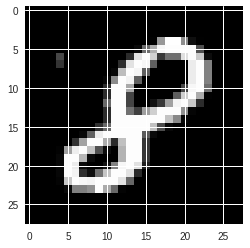

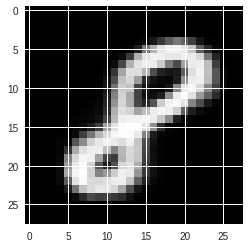

(11000, 27.174526, 17.49921, 9.675316)


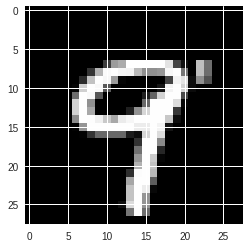

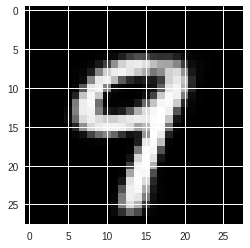

(11200, 28.05144, 17.806173, 10.245267)


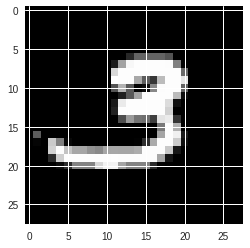

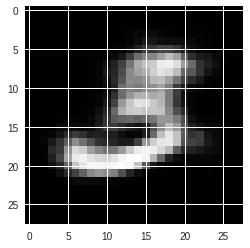

(11400, 27.73333, 16.855312, 10.878019)


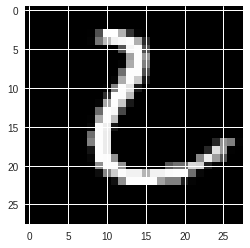

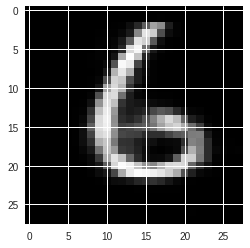

(11600, 26.685896, 16.586452, 10.0994425)


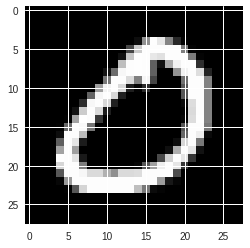

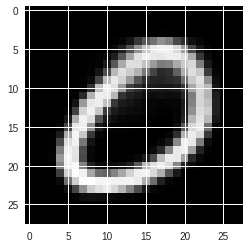

(11800, 28.664495, 18.409092, 10.255404)


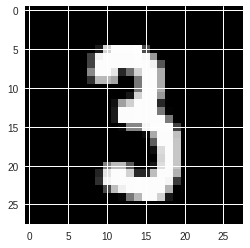

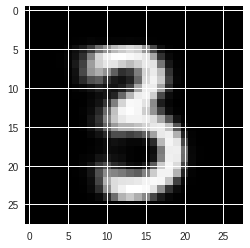

(12000, 28.437521, 17.617495, 10.820026)


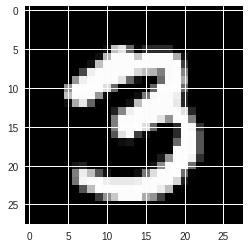

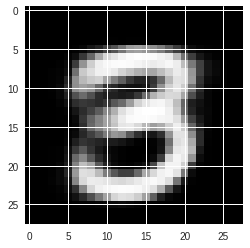

(12200, 26.45782, 16.400694, 10.057127)


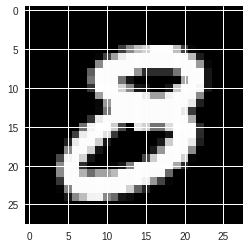

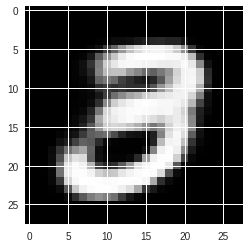

(12400, 28.227835, 16.90807, 11.319763)


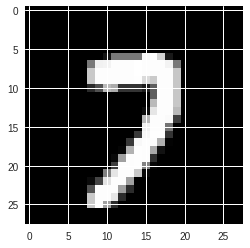

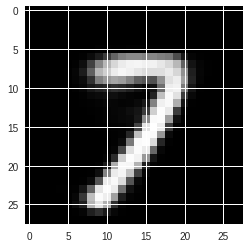

(12600, 28.103336, 17.847649, 10.255688)


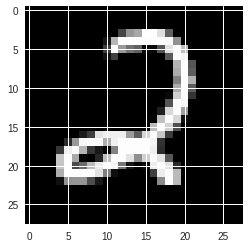

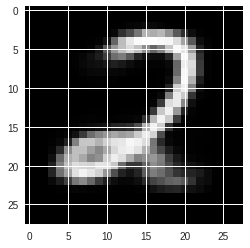

(12800, 29.731964, 19.351242, 10.380724)


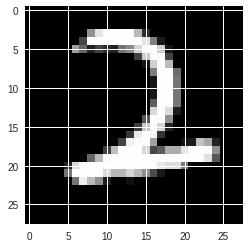

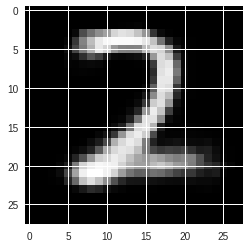

(13000, 28.087162, 17.319511, 10.767651)


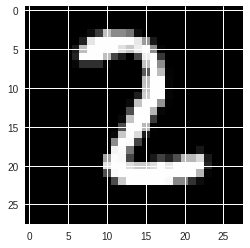

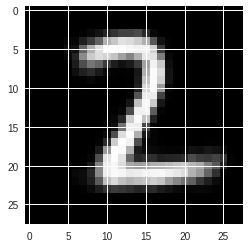

(13200, 26.406345, 16.01209, 10.394254)


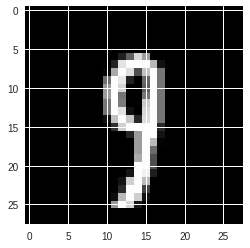

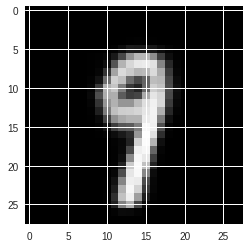

(13400, 27.507977, 16.880665, 10.62731)


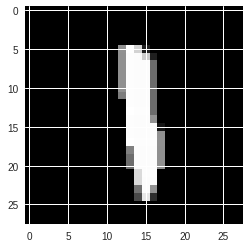

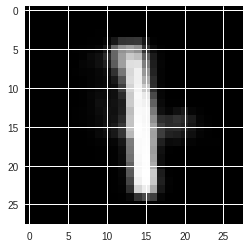

(13600, 27.004457, 16.247395, 10.757064)


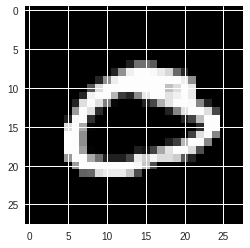

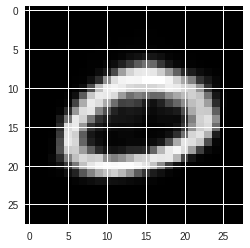

(13800, 28.216866, 17.597698, 10.619165)


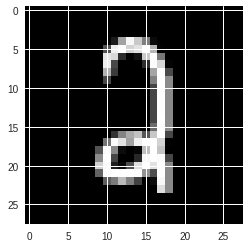

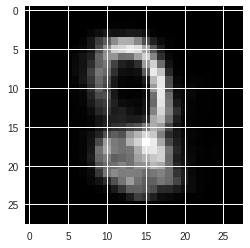

(14000, 28.673374, 18.224907, 10.448468)


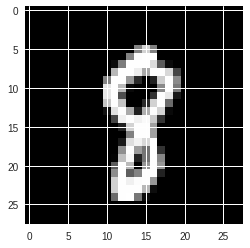

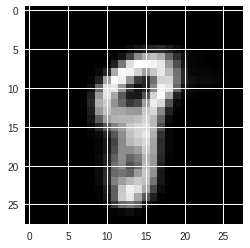

(14200, 27.871355, 17.252972, 10.618385)


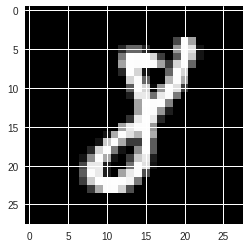

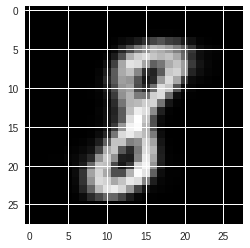

(14400, 27.354076, 16.621681, 10.732395)


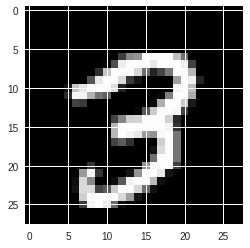

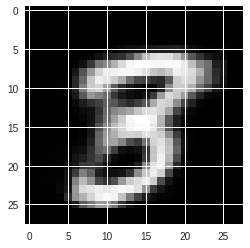

(14600, 27.948004, 17.880333, 10.067671)


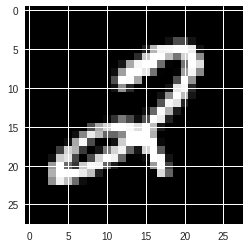

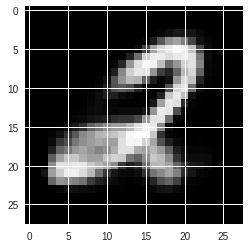

(14800, 27.937307, 17.1903, 10.747007)


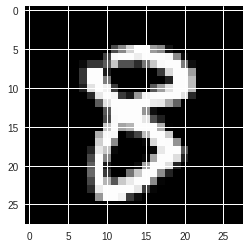

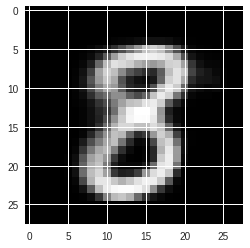

(15000, 28.680393, 17.343922, 11.336472)


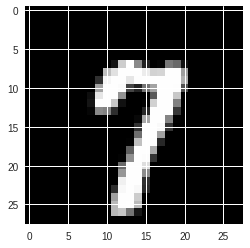

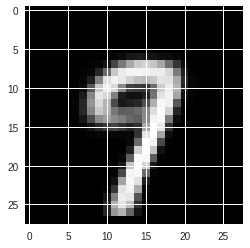

(15200, 28.55365, 18.073503, 10.480146)


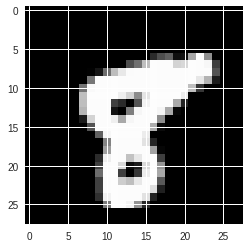

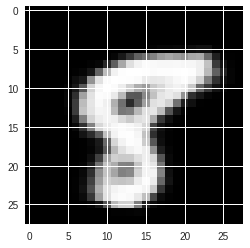

(15400, 27.586693, 17.180225, 10.406469)


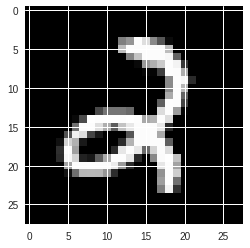

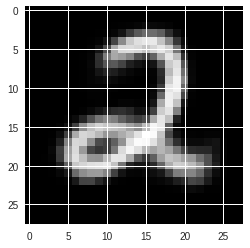

(15600, 26.645325, 16.441017, 10.204306)


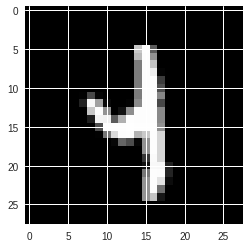

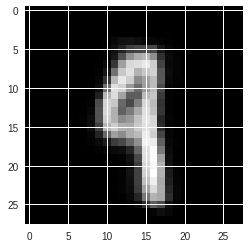

(15800, 26.867085, 16.755838, 10.111246)


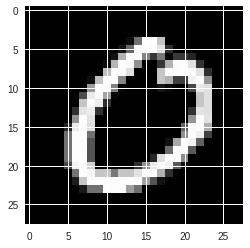

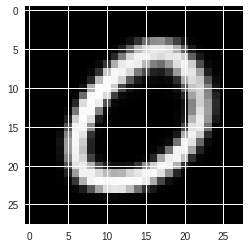

(16000, 27.605951, 16.903645, 10.702308)


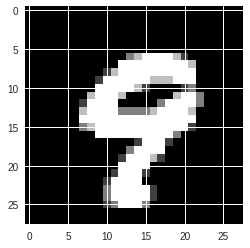

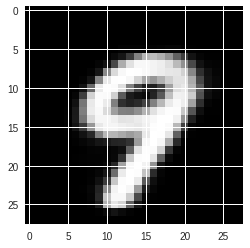

(16200, 27.718256, 16.896248, 10.822007)


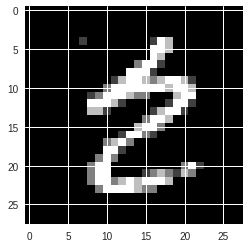

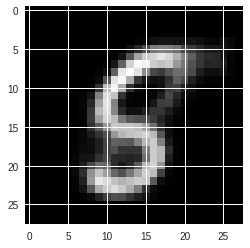

(16400, 27.001938, 16.591003, 10.410934)


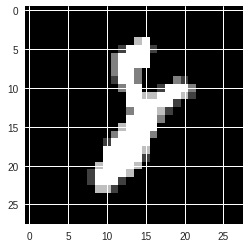

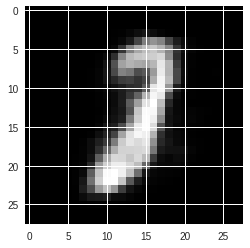

(16600, 28.39338, 18.056252, 10.337128)


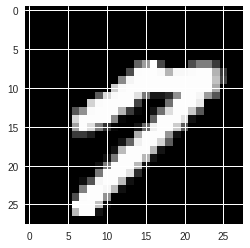

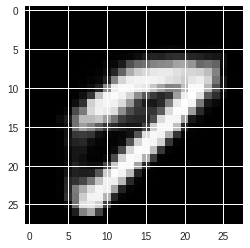

(16800, 25.377113, 15.435684, 9.941429)


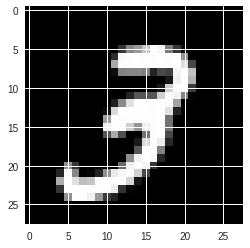

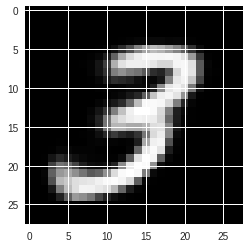

(17000, 27.47147, 16.798838, 10.67263)


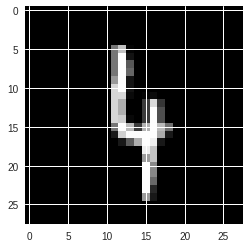

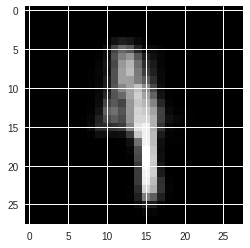

(17200, 28.891415, 18.259838, 10.631578)


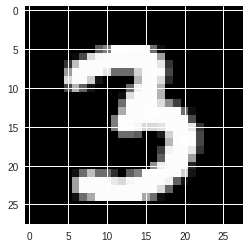

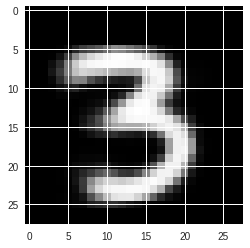

(17400, 26.400562, 15.482384, 10.91818)


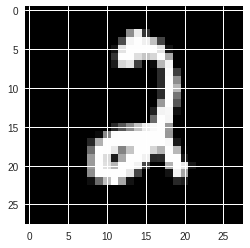

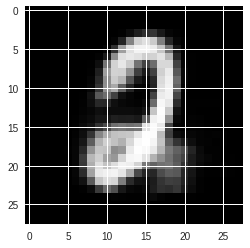

(17600, 27.503242, 17.204012, 10.29923)


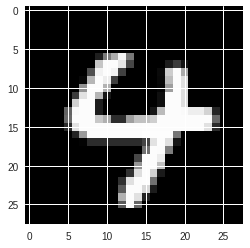

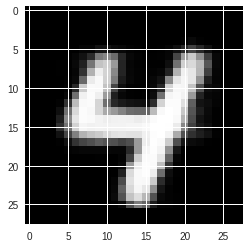

(17800, 29.3474, 18.521341, 10.826058)


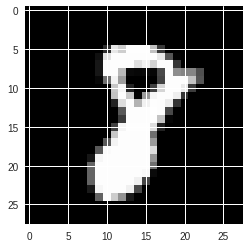

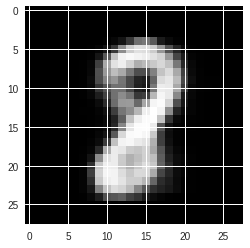

(18000, 26.449617, 15.787981, 10.661636)


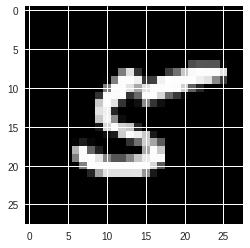

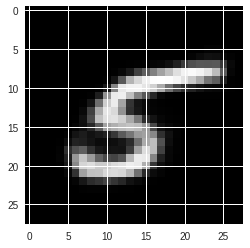

(18200, 28.246399, 17.430906, 10.815491)


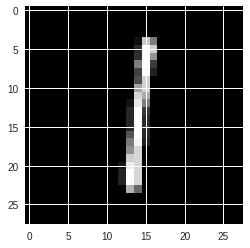

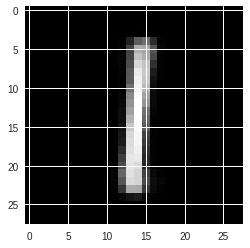

(18400, 26.686375, 15.896643, 10.789732)


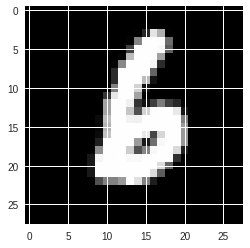

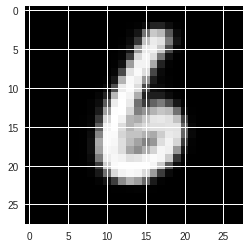

(18600, 26.47805, 16.228283, 10.249767)


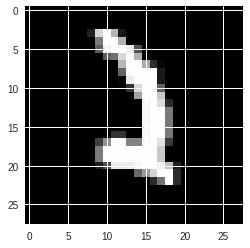

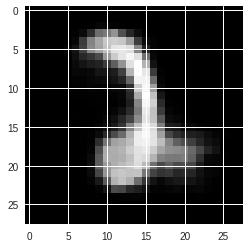

(18800, 29.059277, 18.166847, 10.892427)


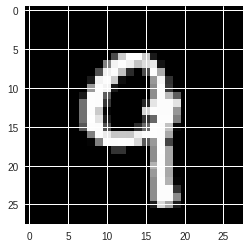

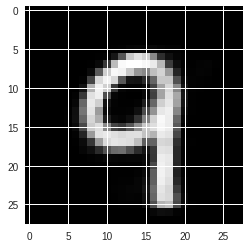

(19000, 28.541735, 17.641367, 10.900367)


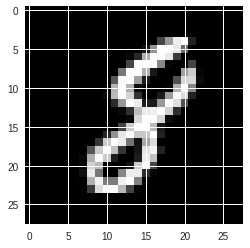

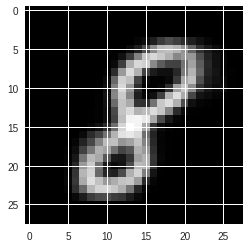

(19200, 27.73634, 17.804928, 9.931412)


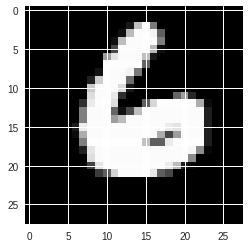

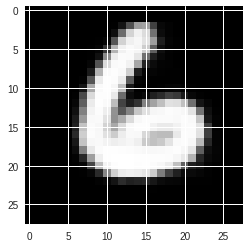

(19400, 27.339598, 16.59283, 10.746767)


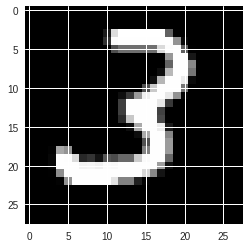

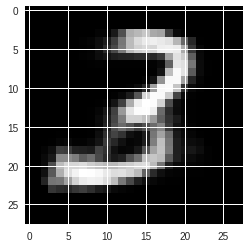

(19600, 29.013107, 17.927029, 11.086081)


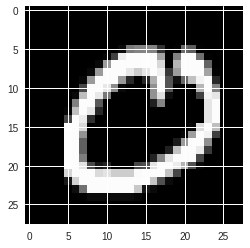

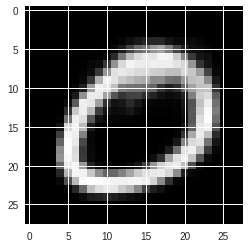

(19800, 27.147005, 16.363483, 10.783522)


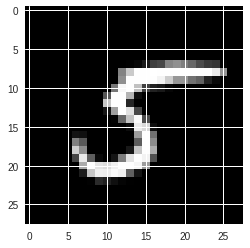

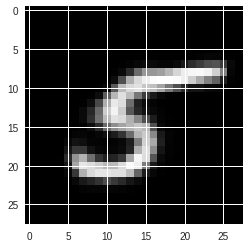

(20000, 24.662113, 14.078839, 10.583273)


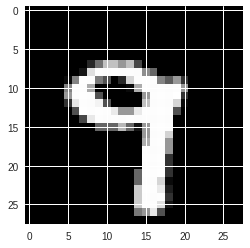

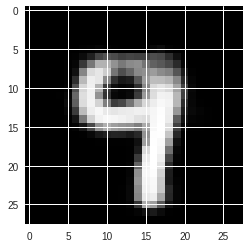

(20200, 27.089554, 16.089321, 11.000233)


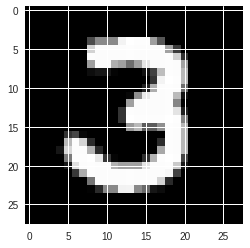

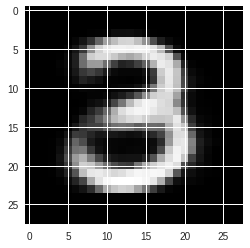

(20400, 27.287552, 16.52216, 10.765393)


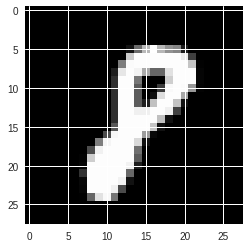

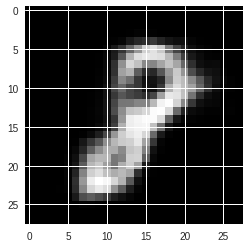

(20600, 26.38258, 15.919371, 10.463207)


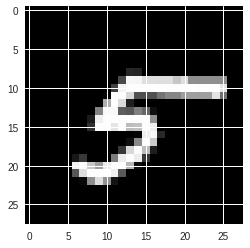

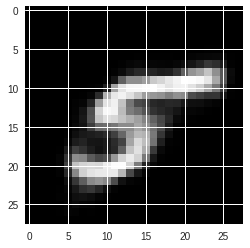

(20800, 26.18989, 15.659996, 10.529894)


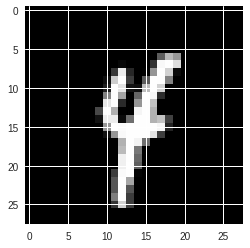

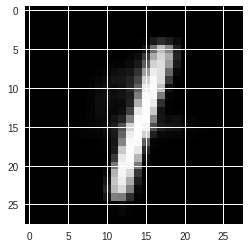

(21000, 25.980309, 14.942509, 11.0378)


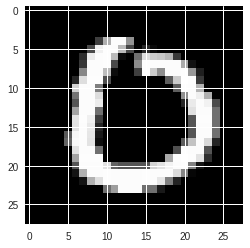

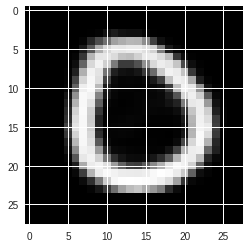

(21200, 27.073723, 16.318573, 10.755151)


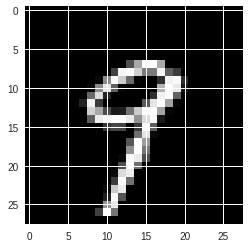

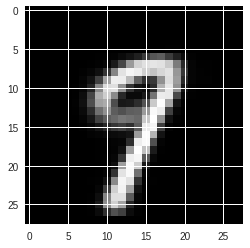

(21400, 28.16629, 16.960728, 11.205562)


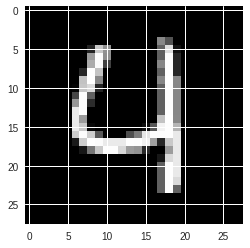

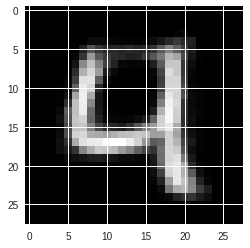

(21600, 26.238806, 16.108839, 10.129966)


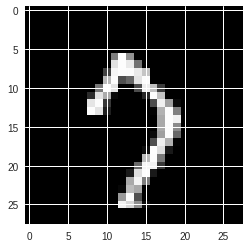

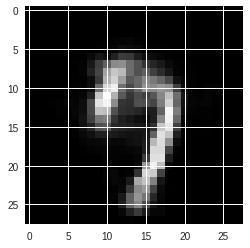

(21800, 26.453392, 16.035069, 10.418322)


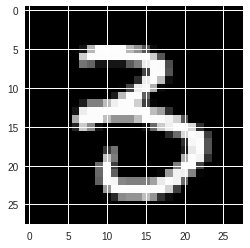

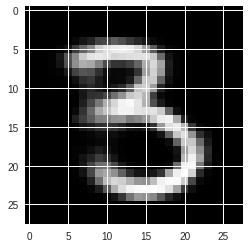

(22000, 26.446856, 15.766897, 10.679959)


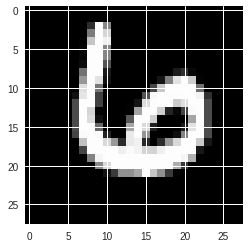

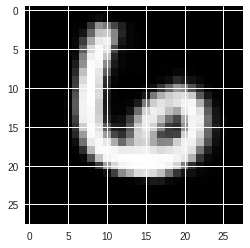

(22200, 27.43296, 16.985764, 10.4472)


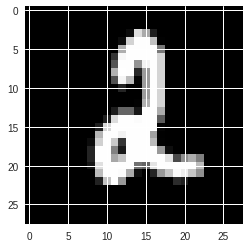

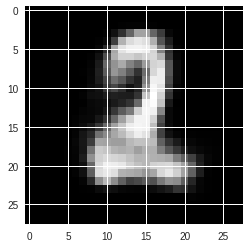

(22400, 27.403036, 16.612415, 10.790621)


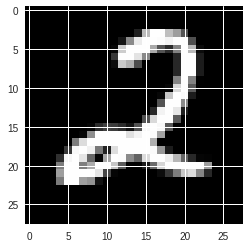

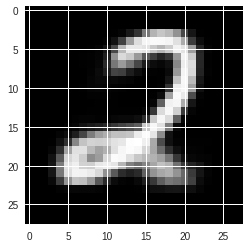

(22600, 25.730349, 14.973736, 10.756614)


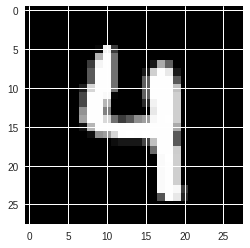

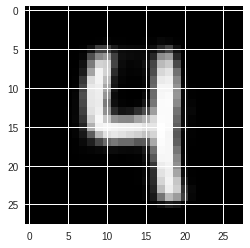

(22800, 25.596243, 15.331868, 10.264376)


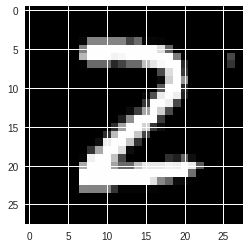

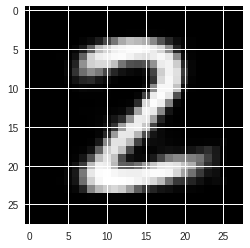

(23000, 26.89812, 16.393126, 10.504996)


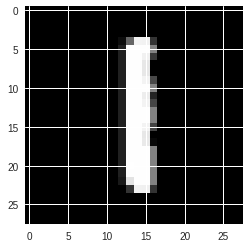

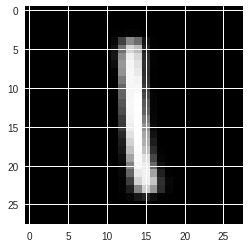

(23200, 27.341402, 16.87834, 10.463062)


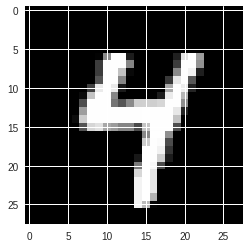

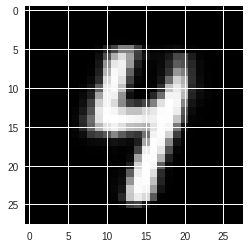

(23400, 26.53984, 16.53957, 10.000271)


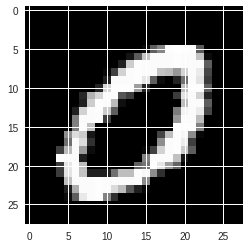

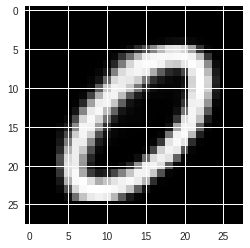

(23600, 28.269218, 17.308245, 10.960975)


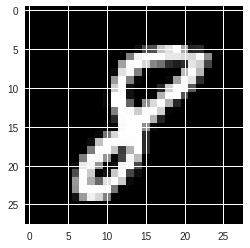

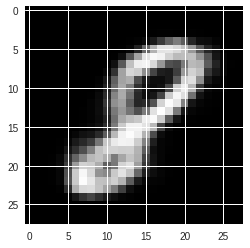

(23800, 28.4599, 17.401308, 11.05859)


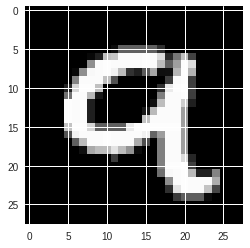

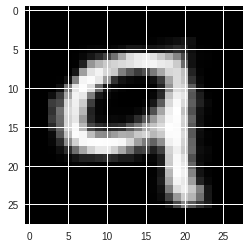

(24000, 28.043125, 16.741367, 11.301758)


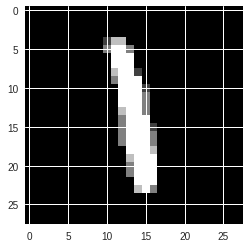

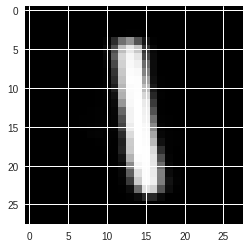

(24200, 25.257267, 14.525181, 10.732085)


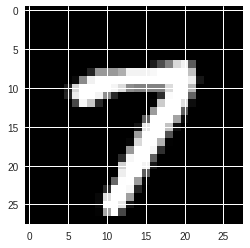

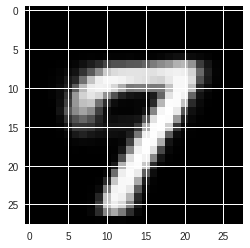

(24400, 28.62619, 17.754047, 10.872141)


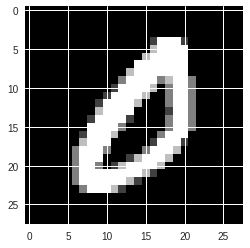

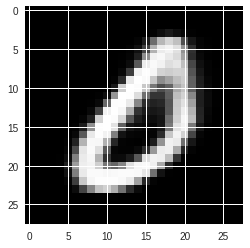

(24600, 29.471327, 18.50108, 10.970247)


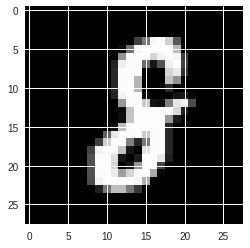

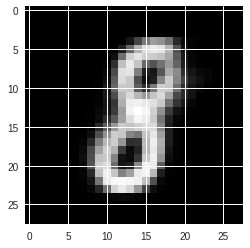

(24800, 26.198956, 15.970382, 10.228575)


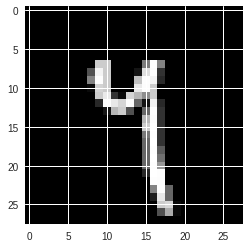

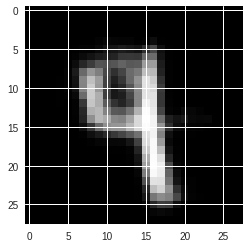

(25000, 24.808802, 14.178741, 10.630059)


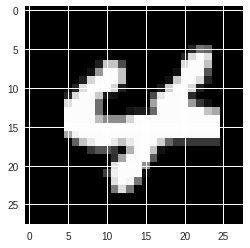

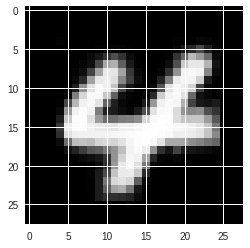

(25200, 27.34249, 16.313137, 11.029352)


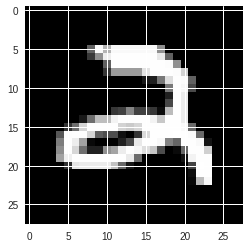

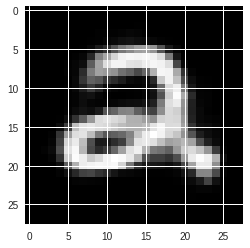

(25400, 27.904837, 17.133644, 10.771191)


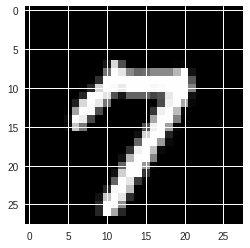

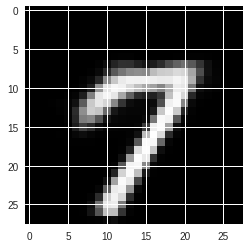

(25600, 26.617065, 16.053364, 10.563703)


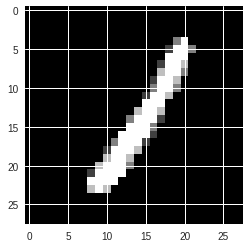

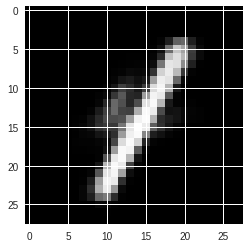

(25800, 27.431309, 16.22573, 11.205578)


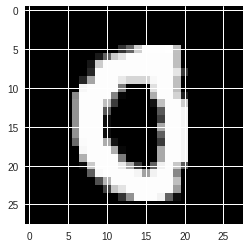

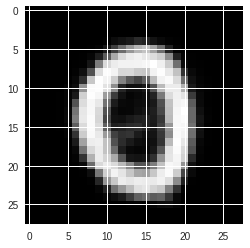

(26000, 26.118237, 15.779424, 10.338814)


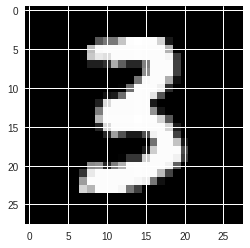

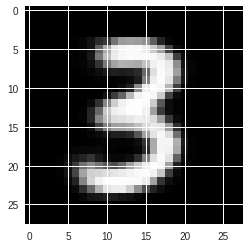

(26200, 28.841413, 17.143309, 11.698105)


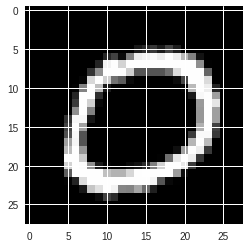

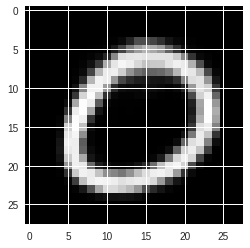

(26400, 26.936962, 16.368618, 10.568346)


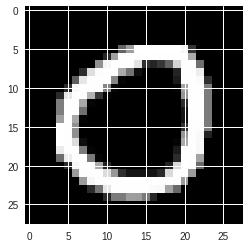

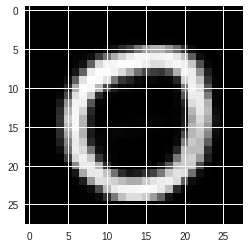

(26600, 26.555538, 16.13527, 10.420272)


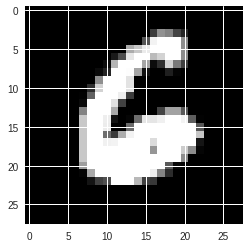

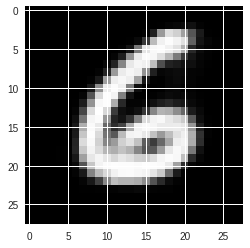

(26800, 27.953766, 17.183294, 10.7704735)


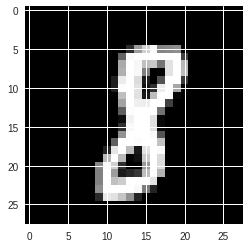

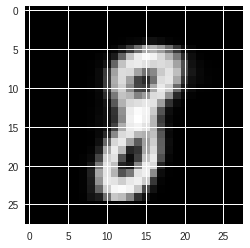

(27000, 26.65596, 15.741234, 10.914726)


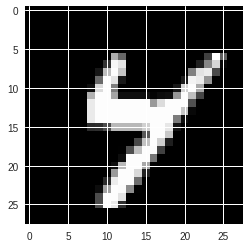

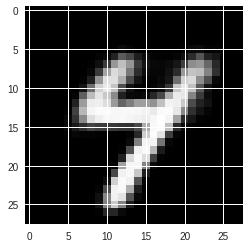

(27200, 25.256626, 14.794117, 10.462509)


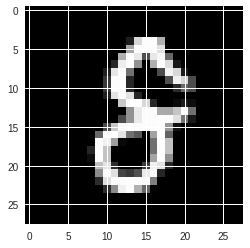

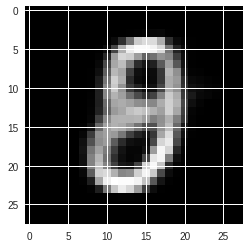

(27400, 28.340921, 17.827374, 10.513548)


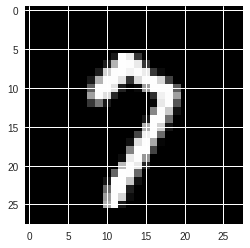

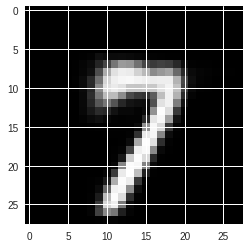

(27600, 27.044144, 16.158136, 10.886005)


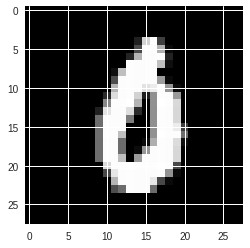

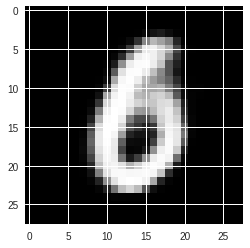

(27800, 25.888144, 15.468836, 10.419308)


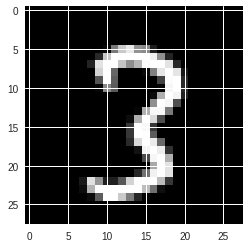

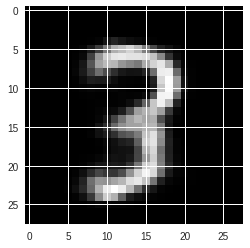

(28000, 28.734701, 18.364391, 10.370308)


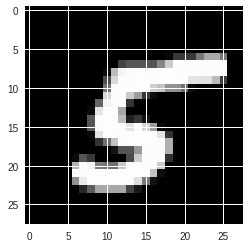

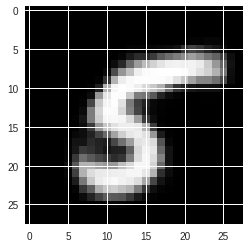

(28200, 25.211128, 14.512519, 10.69861)


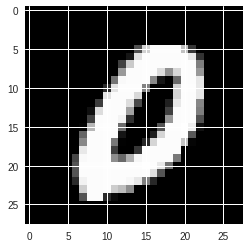

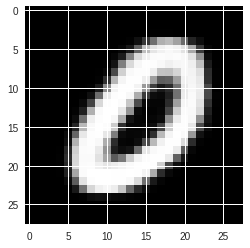

(28400, 27.176624, 15.500334, 11.676291)


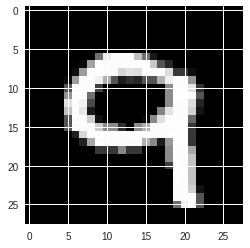

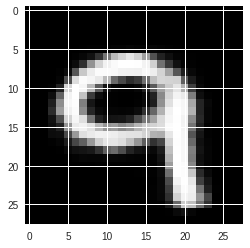

(28600, 26.94292, 16.279278, 10.663643)


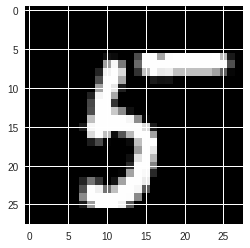

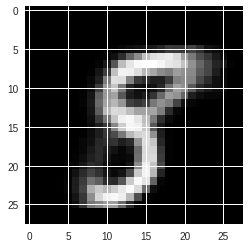

(28800, 26.752838, 15.943359, 10.809478)


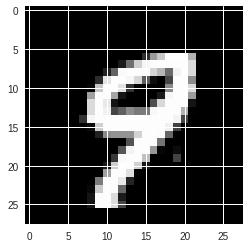

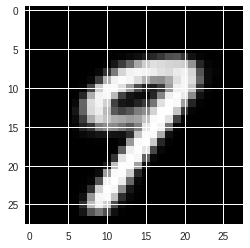

(29000, 26.935514, 16.615845, 10.31967)


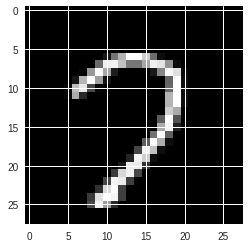

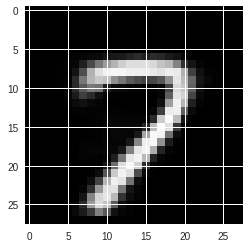

(29200, 27.963408, 16.889526, 11.073881)


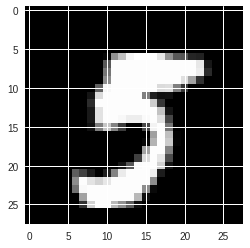

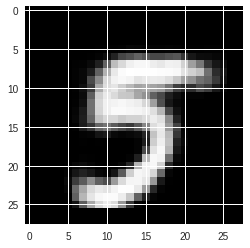

(29400, 27.118608, 16.553097, 10.56551)


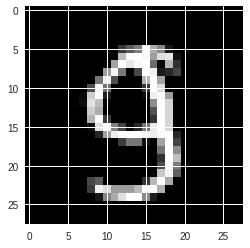

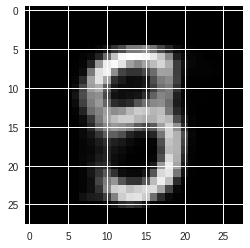

(29600, 27.793257, 16.864914, 10.928345)


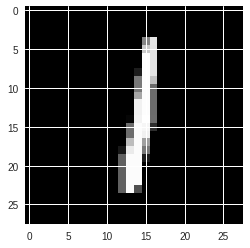

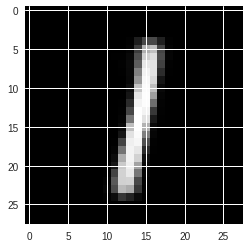

(29800, 24.959698, 14.086054, 10.873642)


In [12]:
for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

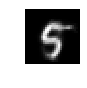

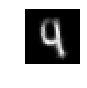

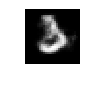

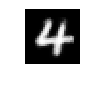

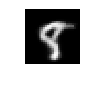

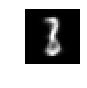

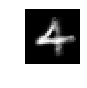

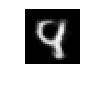

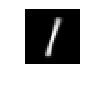

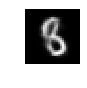

In [18]:
randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')